In [5]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('960.jpg')
img.shape

(620, 960, 3)

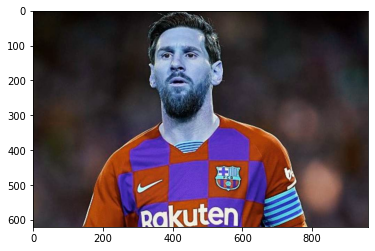

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(620, 960)

In [8]:
gray

array([[ 6,  6,  6, ...,  7,  7,  8],
       [ 6,  6,  6, ...,  7,  8,  8],
       [ 7,  7,  7, ...,  8,  8,  8],
       ...,
       [61, 61, 60, ..., 48, 48, 48],
       [61, 60, 60, ..., 48, 48, 48],
       [60, 60, 59, ..., 47, 47, 47]], dtype=uint8)

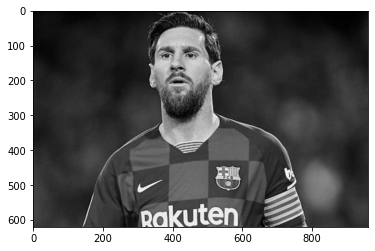

In [10]:
plt.imshow(gray, cmap='gray')

In [16]:
#detect the face using opencv
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[315,  43, 203, 203]], dtype=int32)

In [13]:
#obtain the face position and window info
(x, y, w, h) = faces[0]
x, y, w, h

(315, 43, 203, 203)

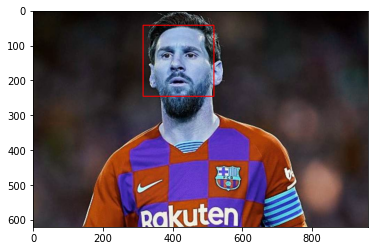

In [14]:
#crop the face from pic
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

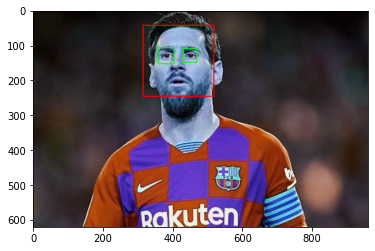

In [18]:
#set the eyes as ROI 
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

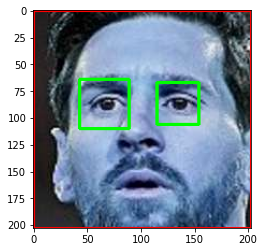

In [19]:
plt.imshow(roi_color, cmap='gray')

In [29]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

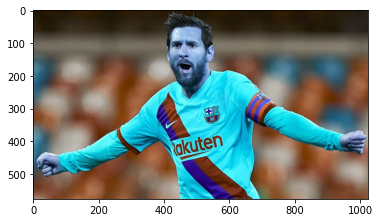

In [32]:
original_image = cv2.imread('messi1.jpg')
plt.imshow(original_image)

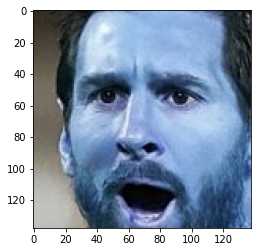

In [38]:
cropped_image = get_cropped_image('messi1.jpg')
plt.imshow(cropped_image)

In [40]:
#wavelet transform
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img

    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

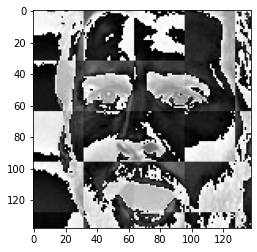

In [41]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')